# BeautifulSoup
- HTML 문서에서 원하는 부분출 추출해내는 라이브러리
- 'requests'는 HTML을 텍스트 형태로 출력할 뿐이지 실제 HTML 태그를 다루지는 않는다.
- BeautifulSoup 라이브러리는 위의 텍스트 결과를 실제 HTML 코드로 변환해준다.

## BeautifulSoup
- BeautifulSoup()
    - 문자열 HTML 코드를 실제 HTML 코드로 변환해주는 함수

    ```python
    BeautifulSoup(문자열, 'html.parser')
    # 문자열을 HTML 코드로 해석해서 읽어라
    ```

- find_all()
    - HTML 코드에서 우리가 원하는 부분을 모두 가져오는 함수
    - 원하는 부분을 지정할 때 사용하는 것은 태그와  Selector
    - 해당 태그의 모든 HTML 코드를 리스트 형태로 반환

    ```python
    # <div id="example1">
    실제HTML코드.find_all("div") # 태그 이름
    실제HTML코드.find_all(id="example1") # 선택자 정보

    # <div id="example1">, <span class="example2">
    실제HTML코드.find_all(["div", "span"]) # 태그 이름
    실제HTML코드.find_all(attrs = {"id":"example1", "class":"example2"}) # 선택자 정보
    ```



- find()
    - 하나의 부분만 가져오는 함수

    ```python
    # <div id="example1">
    실제HTML코드.find("div") # 태그 이름
    실제HTML코드.find(id="example1") # 선택자 정보
    실제HTML코드.find(attrs = {"id":"example1"}) # 선택자 정보
    실제HTML코드.find("div", {"id":"example1"}) # 태그 이름 + 선택자 정보
    ```

# 함수 find() vs find_all()
- 두 함수의 차이점을 이해하면 효율적으로 크롤링을 할수 있다.
- 로또 당첨 번호를 조회해 보자
- [당첨번호 확인](https://dhlottery.co.kr/gameResult.do?method=byWin)

In [28]:
from bs4 import BeautifulSoup
import requests

In [29]:
lotto_url = "https://dhlottery.co.kr/gameResult.do?method=byWin"
raw = requests.get(lotto_url)
soup = BeautifulSoup(raw.text, "html.parser")

In [30]:
soup


<!DOCTYPE html>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="동행복권" id="utitle" name="title"/>
<meta content="동행복권 1153회 당첨번호 1,9,10,13,35,44+5. 1등 총 15명, 1인당 당첨금액 2,027,312,925원." id="desc" name="description"/>
<title>로또6/45 - 회차별 당첨번호</title>
<title>동행복권</title>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<link href="/images/common/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/images/common/favicon.ico" rel="icon" type="image/x-icon"/>
<script src="/js/jquery-1.9.1.min.js" type="text/javascript"></script>
<script src="/js/jquery-ui.js" type="text/javascript"></script>
<script charset="utf-8" src="/js/common.js" type="text/javascript"></script>
<script type="text/javascript">

fn_g_init_message("");

var gameUserId = "";

function goGame(){
	var userId = "";
	
	if(userId == '' || userId == null){
		alert("로그인 후 사용 해주시기 바랍니다.");
		location.href = "/user.do?method=login";
		return;
	}
	
	$.ajax({
		type:"get",                          

In [31]:
box = soup.find("div", {"class":"num win"})

In [33]:
box

<div class="num win">
<strong>당첨번호</strong>
<p>
<span class="ball_645 lrg ball1">1</span>
<span class="ball_645 lrg ball1">9</span>
<span class="ball_645 lrg ball1">10</span>
<span class="ball_645 lrg ball2">13</span>
<span class="ball_645 lrg ball4">35</span>
<span class="ball_645 lrg ball5">44</span>
</p>
</div>

In [34]:
list_1 = ["a","b"]

In [35]:
list_1.append("c")

In [36]:
list_1

['a', 'b', 'c']

In [38]:
list_2 = []
for i in range(10):
    list_2.append(i)

In [39]:
list_2

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [40]:
nums = box.find_all("span")

In [41]:
nums

[<span class="ball_645 lrg ball1">1</span>,
 <span class="ball_645 lrg ball1">9</span>,
 <span class="ball_645 lrg ball1">10</span>,
 <span class="ball_645 lrg ball2">13</span>,
 <span class="ball_645 lrg ball4">35</span>,
 <span class="ball_645 lrg ball5">44</span>]

In [49]:
nums[0].text
#...
nums[4].text

'35'

In [52]:
for i in nums:
    print(i.text)

1
9
10
13
35
44


In [53]:
nums = box.find_all("span")
result = []
for num in nums:
    result.append(num.text)
print(result)

['1', '9', '10', '13', '35', '44']


In [6]:
def lotto_win()->list:
    lotto_url = "https://dhlottery.co.kr/gameResult.do?method=byWin"
    raw = requests.get(lotto_url)
    soup = BeautifulSoup(raw.text, "html.parser")
    box = soup.find("div", {"class":"num win"})
    nums = box.find_all("span")
    result = []
    for num in nums:
        result.append(num.text)
    return result

In [7]:
lotto_win()

['1', '9', '10', '13', '35', '44']

In [55]:
# 네이버 국내 인기 증시
# https://finance.naver.com/sise/

In [56]:
finance_url = "https://finance.naver.com/sise/"
finance_raw = requests.get(finance_url)
# print(finance_raw)
finance_soup = BeautifulSoup(finance_raw.text, "html.parser")

In [58]:
finance_soup.find("ul", {"id":"popularItemList"}).find_all("li")

[<li><em>1.</em><a href="/item/main.naver?code=005930" onclick="clickcr(this,'boa.list','005930','1',event)">삼성전자</a><span class="dn">57,200</span><em class="bu_p bu_pdn"><span class="blind">하락</span></em></li>,
 <li><em>2.</em><a href="/item/main.naver?code=000660" onclick="clickcr(this,'boa.list','000660','2',event)">SK하이닉스</a><span class="up">204,500</span><em class="bu_p bu_pup"><span class="blind">상승</span></em></li>,
 <li><em>3.</em><a href="/item/main.naver?code=011790" onclick="clickcr(this,'boa.list','011790','3',event)">SKC</a><span class="up">157,300</span><em class="bu_p bu_pup"><span class="blind">상승</span></em></li>,
 <li><em>4.</em><a href="/item/main.naver?code=277810" onclick="clickcr(this,'boa.list','277810','4',event)">레인보우로보틱스</a><span class="dn">229,500</span><em class="bu_p bu_pdn"><span class="blind">하락</span></em></li>,
 <li><em>5.</em><a href="/item/main.naver?code=062970" onclick="clickcr(this,'boa.list','062970','5',event)">한국첨단소재</a><span class="up">9,610</s

In [59]:
s_1 = finance_soup.find("ul", {"id":"popularItemList"}).find_all("li")
for i in s_1:
    print(f'{i.find("a").text}')

삼성전자
SK하이닉스
SKC
레인보우로보틱스
한국첨단소재
한미반도체
한화오션
필옵틱스
HLB
유한양행


In [60]:
list_1=["a", "b", "c"]
for j, i in enumerate(list_1):
    print(j, i)

0 a
1 b
2 c


In [10]:
s_1 = finance_soup.find("ul", {"id":"popularItemList"}).find_all("li")
for j,i in enumerate(s_1):
    print(f'{j+1} {i.find("a").text}')

1 삼성전자
2 한국첨단소재
3 한미반도체
4 유한양행
5 한화오션
6 SK하이닉스
7 레인보우로보틱스
8 HLB
9 에코프로
10 신성델타테크


In [63]:
def finance_pop():  
    finance_url = "https://finance.naver.com/sise/"
    finance_raw = requests.get(finance_url)
    # print(finance_raw)
    finance_soup = BeautifulSoup(finance_raw.text, "html.parser")
    s_1 = finance_soup.find("ul", id="popularItemList").find_all("li")
    for j,i in enumerate(s_1):
        print(f'{j+1} {i.find("a").text}')

In [64]:
finance_pop()

1 SK하이닉스
2 삼성전자
3 한국첨단소재
4 SKC
5 레인보우로보틱스
6 한화오션
7 한미반도체
8 유한양행
9 알테오젠
10 HLB


# URL 패턴
- https://search.hankyung.com/search/news?query=%EC%BD%94%EB%A1%9C%EB%82%98&page=1
- url 패턴 : query="검색값"&page="페이지값"

- 한경 사이트에서 검색어를 입력하면 기사 제목을 3페이지 까지 크롤링하도록 작성해 보세요
```
다음날 느껴지는 입체 탄력피부 비결은 아모레퍼시픽 TR...
비피도 주가 아모레퍼시픽 마이크로바이옴 관련주 분석
아모레퍼시픽 팝업 전시, 유행화장전 꿀잼 방문후기...
오프화이트 아모레퍼시픽 프로텍션박스 개봉기
신용산 쌀국수 베트남 음식 맛집 아모레퍼시픽 포포유 맛있어
아모레퍼시픽 유행화장 팝업전시, 한남동 storyA 꼭 방문해봐요
아모레퍼시픽 마케팅 지원자 모의면접 피드백 (1분 자기소개...
아모레퍼시픽을 선택할 것인가, 하나투어를 선택할 것인가
아모레퍼시픽 유행화장 전시에서 레트로 시간여행하고온 후기!
아모레퍼시픽 팝업 전시! 유행화장전으로 시간 여행 떠나요~
국내 주식 아모레퍼시픽 유상증자 및 역삼각합병(삼각합병)
오프화이트 X 아모레퍼시픽 프로텍션 박스 소장가치 100%야
경제기사)_동아에스티_라네즈_아모레퍼시픽_포스코...
아모레퍼시픽 빈티지에센스 , 더 맑고 더 탄력있는 항산화에너지
[아모레퍼시픽×금귤] ★필독 틈새공지★ 10월부터 쿠폰...
서울 성수 나들이 : 아모레퍼시픽 성수점, 커먼그라운드...
아모레퍼시픽 타임레스폰스앰플, 압도적 입체 탄력앰플 추천
아모레퍼시픽 타임 레스폰스 앰플 ! 입체 탄력 케어에 도움을...
아모레퍼시픽(090430) 종목분석 리포트 2022.07.29 교보증권
아모레퍼시픽 본사 All about Amore 행사 초청으로...
아모레퍼시픽 '22.1Q 실적 리뷰 : 부진의 정점과 긍정적 변화
수혜주 - 아모레퍼시픽, LG생활건강, 한국콜마, 코스맥스...
(화장품 관련주) 아모레퍼시픽 주가 전망은?
LG생활건강, 아모레퍼시픽, 네오팜 - 화장품업계는 중국없으면...
화장품 관련주 아모레퍼시픽 주가, 3분기 실적발표 어닝쇼크...
삼성전자_이재용_메타_LG생활건강_아모레퍼시픽_한국은행_RP매입
아모레퍼시픽 주가, 전망 알아볼까요?
아모레퍼시픽 주가 알아보기
서울 전시 안드레아스 거스키 사진전 @아모레퍼시픽미술관
아모레퍼시픽몰 뷰티포인트 5천원 바이탈뷰티 100원딜 이벤트...
```



- [참고: URL 인코딩/디코딩 (URL Encoding/Decoding)](https://it-eldorado.tistory.com/143)  
<img src="https://blog.kakaocdn.net/dn/caNQvW/btq4JfrNJfP/zdIHGBlZFZr26k2XeHJhbK/img.png">

In [13]:
query = "삼성전자"
hankyung_url = f"https://search.hankyung.com/search/news?query={query}&page=1"
hankyung_raw = requests.get(hankyung_url)
# print(hankyung_raw)
hankyung_bs = BeautifulSoup(hankyung_raw.text, "html.parser")
# print(hankyung_bs)
hankyung_bs.find("div", {"class":"section_cont"})

<div class="section_cont">
<ul class="article">
<li>
<div class="txt_wrap">
<div class="thumbnail">
<a href="https://www.hankyung.com/article/2025010951057" target="_blank"><img alt="thumbnail" src="//img.hankyung.com/photo/202501/ZN.39128312.3.jpg"/></a>
</div>
<a href="https://www.hankyung.com/article/2025010951057" target="_blank">
<em class="tit" data-pm="N">[속보] 젠슨 황 "엔비디아 새 게임용 그래픽에 <strong class="keyword">삼성</strong> 메모리도 탑재"</em>
</a>
<p class="txt">... <strong class="keyword">삼성전자</strong>의 메모리칩이 들어간다고 밝혔다.  황 CEO는 8일(현지시간) 성명을 내고 "지포스 RTX 50시리즈에는 <strong class="keyword">삼성</strong>을 시작으로, 다양한 파트너사의 GDDR7 제품이 들어간다"고 공식화했다.  이는 전날 <strong class="keyword">삼성전자</strong> 메모리칩이 들어가지 않는다고 했던 기존 발언을 정정한 것이다. 젠슨황은 "<strong class="keyword">삼성</strong>을 시작으로"라며 다양한 파트너사 중 하나로 <strong class="keyword">삼성</strong>을 언급했다.  김수영 한경닷컴 기자 swimmingk@hankyung.com</p>
<p class="info">
<span>한국경제</span>
                                        | <span class="date_time">2025.01.09 08:35</span>
 | 김수영

In [ ]:
class_

In [65]:
for i in hankyung_bs.find("div", {"class":"section_cont"}).find_all("li"):
    print(i.find("em", class_="tit").text)

새해에도 큰손 '조·방·인 사랑' 여전했다
車·선박도 삼성 '스마트싱스'
'갤럭시S25' 베일 벗는다…미국서 22일 공개
[마켓칼럼] 올해도 주식이 매력적인 투자처…"日·中 증시도 주목"
투신 순매수 상위- 삼성전자 , 한화오션 등
삼성, 아이 돌보는 AI로봇 '볼리' 출시 예고
답답한 증시…"실적 눈높이 오르는 종목으로 대피하라"
'젠슨황 배신'에 삼성전자 '털썩'…코스피, 2500 탈환 실패
코스피, 상승세는 이어갔지만…'산통' 깬 엔비디아
포자랩스, CES 2025에서 삼성전자·SM과 공간 음향 콘텐츠 공개 [Geeks' Briefing]


In [66]:
hankyung_bs.find("div", {"class":"section_cont"}).find_all("li")[0].find("em", class_="tit").text

"새해에도 큰손 '조·방·인 사랑' 여전했다"

In [17]:
# 검색어를 입력 하세요 : 삼성전자
# 몇페이지 까지 검색하실건가요 : 3
# 1 부터 3페이지 까지의 결과를 출력 


# 재계 총수들, 부산엑스포 유치 힘 보탠다
# 재계 총수들 런던 찍고 파리 집결…부산엑스포 유치 막판 총력전
# 글로벌 기업 노린 특허소송, 중국이 배후
# "韓 성장률 5% 달성하려면 '매출 1000억달러' 기업 5곳 나와야"
# [부고] 김복순 씨 별세 外
# 결심공판 끝난 이재용 첫 행보는 유럽사업 점검
# ...


In [67]:
query = input("검색어를 입력 하세요 : ")
page = int(input("몇페이지 까지 검색하실건가요 : "))
for page_num in range(1, page+1):
    hankyung_url = f"https://search.hankyung.com/search/news?query={query}&page={page_num}"
    hankyung_raw = requests.get(hankyung_url)
    # print(hankyung_raw)
    hankyung_bs = BeautifulSoup(hankyung_raw.text, "html.parser")
    # print(hankyung_bs)
    hankyung_bs.find("div", {"class":"section_cont"})
    for i in hankyung_bs.find("div", {"class":"section_cont"}).find_all("li"):
        print(i.find("em", class_="tit").text)

검색어를 입력 하세요 :  삼성전자
몇페이지 까지 검색하실건가요 :  5


삼성전기 'Mi-RAE' 신사업 발표
"삼성 제품 쓴다" 말 바꾼 젠슨 황…최태원 '쿨한 반응'
中 상무부 규제 소식에 부진 겪던 2차전지株 웃었다.
최태원, 젠슨 황과 회동…SK하이닉스, 4%↑
코스피, 5일째 상승 출발…“업종별 차별화 장세 지속”
연초 코스피 상승세, 올해는 상승흐름 가능할까?
[투자운세] 1월9일(오늘) 궁합이 맞는 종목은?
SK하이닉스, 최태원·젠슨 황 만남에 강세…20만원 돌파
젠슨 황 "새 GPU에 삼성 메모리도 탑재"…하루 만에 정정 [종합]
젠슨 황 만난 최태원 "하이닉스 개발속도, 엔비디아 넘었다"
젠슨 황 "지포스 시리즈에 삼성 메모리도 탑재"
"미술관 갈 필요 없겠네"…갤러리 임원도 놀란 '아트 TV'
코스피, 장 초반 2520선 강보합…외인은 5일째 '사자'
DSR 해답을 스탁론 업계 1위는 찾았다...수익을 4배로 늘리고 싶다면?
"美, AI칩 수출통제 전 세계로…韓 등 동맹 제외"
25년도 나의 증권계좌를 빛내 줄 종목추천 알고리즘은?
말 바꾼 젠슨 황 "엔비디아 신제품에 삼성 메모리 탑재"
최태원 "SK의 AI 메모리칩 수준, 엔비디아 요구 뛰어넘고 있다" [CES 2025]
얼마나 춥길래? 세탁기도 '꽁꽁'…"잔수 제거해야"
[속보] 젠슨 황 "새 게임용 그래픽에 삼성 메모리도 탑재"
엔비디아 젠슨 황 "새 게임용 그래픽에 삼성 메모리도 탑재"
[마켓PRO] Today's Pick : "LG이노텍, 2025년은 피할 수 없는 보릿고개"
[속보] "美, AI칩 수출통제 전세계로 확대…한국 등 동맹은 예외"
"美, AI칩 수출통제 전세계로 확대…한국 등 동맹은 예외"
젠슨 황 만난 최태원 "개발 속도, 엔비디아 요구 넘어서"
"삼성전자 실적 부진했지만"…증권가, '반전 전망' 내놨다 [종목+]
힐리언스 코어센터, 직원 운동 복지 이용자 25% 증가...
한파에 방치했다 '아뿔싸'...관리 필요한 '이 가전'
"100만원 넘었다"…어닝쇼크 조짐에도 다시 돌아온 '황제주' [종목+]
바이든 '후회'..."대선 출마했다면 

In [41]:
%%writefile hksearch.py

from bs4 import BeautifulSoup
import requests

def hankyung_news(query, page):
    for page_num in range(1, page+1):
        hankyung_url = f"https://search.hankyung.com/search/news?query={query}&page={page_num}"
        hankyung_raw = requests.get(hankyung_url)
        # print(hankyung_raw)
        hankyung_bs = BeautifulSoup(hankyung_raw.text, "html.parser")
        # print(hankyung_bs)
        hankyung_bs.find("div", {"class":"section_cont"})
        for i in hankyung_bs.find("div", {"class":"section_cont"}).find_all("li"):
            print(i.find("em", class_="tit").text)

def main():
    query = input("검색어를 입력 하세요 : ")
    page = int(input("몇페이지 까지 검색하실건가요 : "))
    hankyung_news(query, page)

if __name__ == "__main__":
    main()


Overwriting hksearch.py


In [2]:
# wordcloud
!pip install wordcloud

In [ ]:
import matplotlib.pyplot as plt # plt는 시각화 도구 wordcloud 에서 사용
from wordcloud import WordCloud # wordcloud
from collections import Counter # 빈도 계산
import requests
from bs4 import BeautifulSoup

# 검색어와 페이지 수 입력
query = input("검색어를 입력 하세요: ")
pages = int(input("몇 페이지까지 검색하실건가요: "))

# 뉴스 데이터 수집
all_news = [] # 빈 리스트 생성 후 크롤링한 뉴스 데이터 저장
for page_num in range(1, pages + 1):
    hankyung_url = f"https://search.hankyung.com/search/news?query={query}&page={page_num}"
    hankyung_raw = requests.get(hankyung_url)
    hankyung_bs = BeautifulSoup(hankyung_raw.text, "html.parser")
    news_section = hankyung_bs.find("div", {"class": "section_cont"})
    if news_section:
        for item in news_section.find_all("li"):
            title = item.find("em", class_="tit")
            if title:
                all_news.append(title.text) #뉴스 title 데이터 저장

# 검색 결과가 없는 경우 종료
if not all_news:
    print("검색 결과가 없습니다.")
else:
    # 텍스트 전처리
    def preprocess_text(text):
        text = text.replace("[", "").replace("]", "").replace("...", " ")
        text = text.replace(",", " ").replace("\"", "")
        return text

    processed_text = preprocess_text(" ".join(all_news))

    # 단어 빈도 계산
    words = processed_text.split()
    word_counts = Counter(words)

    # 워드클라우드 생성
    wordcloud = WordCloud(
        font_path='c:/windows/fonts/malgunsl.ttf',  # 한글 폰트 경로 입력
        collocations=False,  # 단어의 중복 결합 방지
        width=800,           # 워드클라우드 이미지의 가로 크기
        height=400,          # 워드클라우드 이미지의 세로 크기
        background_color='white',  # 배경 색상 설정
        colormap='viridis',        # 색상 맵 설정
        max_words=100              # 표시할 최대 단어 수 설정
    ).generate_from_frequencies(word_counts)

    # 워드클라우드 시각화
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud from Search Results", fontsize=16)
    plt.show()


검색어를 입력 하세요:  아이온큐
몇 페이지까지 검색하실건가요:  10


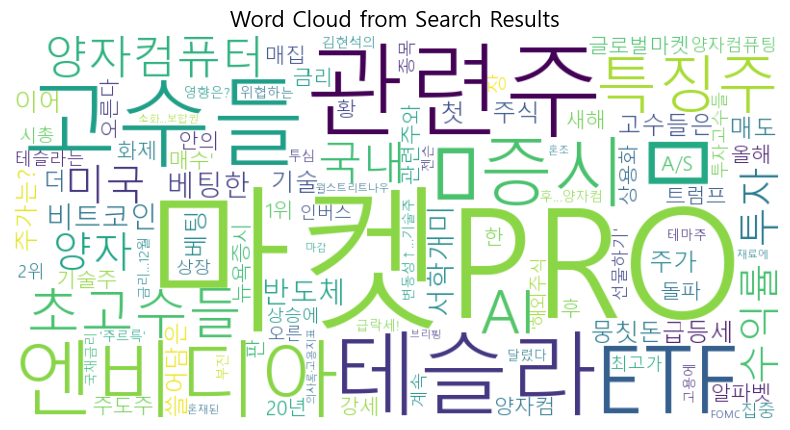

In [68]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import requests
from bs4 import BeautifulSoup

def fetch_hankyung_news(query, pages):
    all_news = []
    for page_num in range(1, pages + 1):
        hankyung_url = f"https://search.hankyung.com/search/news?query={query}&page={page_num}"
        hankyung_raw = requests.get(hankyung_url)
        hankyung_bs = BeautifulSoup(hankyung_raw.text, "html.parser")
        news_section = hankyung_bs.find("div", {"class": "section_cont"})
        if news_section:
            for item in news_section.find_all("li"):
                title = item.find("em", class_="tit")
                if title:
                    all_news.append(title.text)
    return all_news

def preprocess_text(text):
    # 불필요한 특수문자 제거
    text = text.replace("[", "").replace("]", "").replace("...", " ")
    text = text.replace(",", " ").replace("\"", "")
    return text

def generate_wordcloud(news_list):
    # 텍스트 전처리
    processed_text = preprocess_text(" ".join(news_list))

    # 단어 빈도 계산
    words = processed_text.split()
    word_counts = Counter(words)

    # WordCloud 객체를 생성
    wordcloud = WordCloud(
        font_path='c:/windows/fonts/malgunsl.ttf',  # 한글 폰트 경로 입력
        collocations=False,  # 단어의 중복 결합 방지 (예: "빨간 사과"와 "사과 빨간"을 별도로 처리하지 않음)
        width=800,           # 워드클라우드 이미지의 가로 크기
        height=400,          # 워드클라우드 이미지의 세로 크기
        background_color='white',  # 배경 색상을 흰색으로 설정
        colormap='viridis',        # 색상 맵 설정 (viridis 색상 팔레트 사용)
        max_words=100              # 표시할 최대 단어 수 설정
    ).generate_from_frequencies(word_counts)  # 단어 빈도 데이터를 기반으로 워드클라우드 생성

    # 워드 클라우드 시각화
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud from Search Results", fontsize=16)
    plt.show()

if __name__ == "__main__":
    query = input("검색어를 입력 하세요: ")
    pages = int(input("몇 페이지까지 검색하실건가요: "))
    news_list = fetch_hankyung_news(query, pages)
    if news_list:
        generate_wordcloud(news_list)
    else:
        print("검색 결과가 없습니다.")

In [47]:
# Save this file as hksearch_gui.py
# !pip install PyQt5

import sys
from PyQt5.QtWidgets import QApplication, QWidget, QVBoxLayout, QLabel, QLineEdit, QPushButton, QTextEdit, QHBoxLayout
from bs4 import BeautifulSoup
import requests

class HankyungNewsApp(QWidget):
    def __init__(self):
        super().__init__()
        
        self.initUI()
        
    def initUI(self):
        # Set window title
        self.setWindowTitle('Hankyung News Search')
        
        # Create layout
        layout = QVBoxLayout()
        
        # Create input fields and labels
        self.query_label = QLabel('검색어를 입력 하세요 :', self)
        self.query_input = QLineEdit(self)
        
        self.page_label = QLabel('몇페이지 까지 검색하실건가요 :', self)
        self.page_input = QLineEdit(self)
        
        # Create search button
        self.search_button = QPushButton('Search', self)
        self.search_button.clicked.connect(self.search_news)
        
        # Create text area to display results
        self.result_area = QTextEdit(self)
        
        # Add widgets to layout
        layout.addWidget(self.query_label)
        layout.addWidget(self.query_input)
        layout.addWidget(self.page_label)
        layout.addWidget(self.page_input)
        layout.addWidget(self.search_button)
        layout.addWidget(self.result_area)
        
        # Set layout
        self.setLayout(layout)
    
    def search_news(self):
        query = self.query_input.text()
        page = int(self.page_input.text())
        
        self.result_area.clear()
        ㅁㅁ
        for page_num in range(1, page+1):
            hankyung_url = f"https://search.hankyung.com/search/news?query={query}&page={page_num}"
            hankyung_raw = requests.get(hankyung_url)
            hankyung_bs = BeautifulSoup(hankyung_raw.text, "html.parser")
            
            news_items = hankyung_bs.find("div", {"class": "section_cont"}).find_all("li")
            for item in news_items:
                title = item.find("em", class_="tit").text
                self.result_area.append(title)

def main():
    app = QApplication(sys.argv)
    ex = HankyungNewsApp()
    ex.show()
    sys.exit(app.exec_())

if __name__ == "__main__":
    main()ㅁ

SystemExit: 0

In [ ]:
%%writefile hksearch.py

from bs4 import BeautifulSoup
import requests

def hankyung_news(query, page):
    for page_num in range(1, page+1):
        hankyung_url = f"https://search.hankyung.com/search/news?query={query}&page={page_num}"
        hankyung_raw = requests.get(hankyung_url)
        # print(hankyung_raw)
        hankyung_bs = BeautifulSoup(hankyung_raw.text, "html.parser")
        # print(hankyung_bs)
        hankyung_bs.find("div", {"class":"section_cont"})
        for i in hankyung_bs.find("div", {"class":"section_cont"}).find_all("li"):
            print(i.find("em", class_="tit").text)

def main():
    query = input("검색어를 입력 하세요 : ")
    page = int(input("몇페이지 까지 검색하실건가요 : "))
    hankyung_news(query, page)

if __name__ == "__main__":
    main()

위 프로그램을 pyqt로 만들어줘

In [59]:
# 멜론 차트
# https://smu.melon.com/chart/index.htm

melon_url = "https://smu.melon.com/chart/index.htm"
melon_raw = requests.get(melon_url)

In [60]:
# 멜론 차트
# https://smu.melon.com/chart/index.htm

melon_url = "https://smu.melon.com/chart/index.htm"
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Trident/7.0; rv:11.0) like Gecko'}
melon_raw = requests.get(melon_url, headers = header)

In [55]:
melon_raw

<Response [200]>

In [57]:
melon_bs = BeautifulSoup(melon_raw.text, "html.parser")

In [ ]:
melon_bs

In [3]:
melon_url = "https://smu.melon.com/chart/index.htm"
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Trident/7.0; rv:11.0) like Gecko'}
melon_raw = requests.get(melon_url, headers = header)

melon_bs = BeautifulSoup(melon_raw.text, "html.parser")
lst50 = melon_bs.find_all("tr", {"class":"lst50"})
rank_list = []
for lst in lst50:
    rank_list.append(lst.find("div", {"class":"ellipsis rank01"}).text.replace("\n", ""))

In [4]:
rank_list

['Supernova',
 'How Sweet',
 'SPOT! (feat. JENNIE)',
 'Bubble Gum',
 '해야 (HEYA)',
 'Magnetic',
 '고민중독',
 '소나기',
 '나는 아픈 건 딱 질색이니까',
 '미안해 미워해 사랑해',
 '첫 만남은 계획대로 되지 않아',
 '천상연',
 'SHEESH',
 '한 페이지가 될 수 있게',
 '예뻤어',
 'Love wins all',
 '밤양갱',
 '사랑은 늘 도망가',
 '에피소드',
 '비의 랩소디',
 'MAESTRO',
 '우리들의 블루스',
 'Hype Boy',
 '온기',
 '그대만 있다면 (여름날 우리 X 너드커넥션 (Nerd Connection))',
 '모래 알갱이',
 'Drama',
 'To. X',
 'Home',
 'Welcome to the Show',
 '다시 만날 수 있을까',
 'Seven (feat. Latto) - Clean Ver.',
 'I AM',
 '이제 나만 믿어요',
 'Do or Die',
 'ETA',
 '헤어지자 말해요',
 '무지개',
 'Super Shy',
 'EASY',
 'London Boy',
 'Polaroid',
 'Ditto',
 'Smart',
 '그랬나봐',
 '사랑인가 봐',
 '인생찬가',
 'Spicy',
 'Lucky Girl Syndrome',
 'Midas Touch']

In [2]:
import requests
from bs4 import BeautifulSoup

In [3]:
melon_url = "https://www.melon.com/genre/song_list.htm?gnrCode=GN0100"
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Trident/7.0; rv:11.0) like Gecko'}
melon_raw = requests.get(melon_url, headers = header)

In [4]:
melon_bs = BeautifulSoup(melon_raw.text, "html.parser")

In [9]:
tab_name = melon_bs.find("div", {"class": "wrap_tabmenu01 type08"}).find_all("a")

In [12]:
tab_name[0].text

'발라드'

In [13]:
tab_name[0].attrs

{'href': '/genre/song_list.htm?gnrCode=GN0100', 'class': ['link_tab']}

In [14]:
tab_name[0].attrs["href"]

'/genre/song_list.htm?gnrCode=GN0100'

In [15]:
gen_dic = {}
for i in tab_name:
    print(i.text)
    gen_dic[i.text] = i.attrs["href"]

발라드
댄스
랩/힙합
R&B/Soul
인디음악
록/메탈
트로트
포크/블루스


In [21]:
root_url = "https://www.melon.com"

In [23]:
root_url + gen_dic["댄스"]

'https://www.melon.com/genre/song_list.htm?gnrCode=GN0200'

In [34]:
melon_url = "https://www.melon.com/genre/song_list.htm?gnrCode=GN0100"
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Trident/7.0; rv:11.0) like Gecko'}

def get_gets(melon_url = melon_url, header = header):
    root_url = "https://www.melon.com"
    melon_raw = requests.get(melon_url, headers = header)
    melon_bs = BeautifulSoup(melon_raw.text, "html.parser")
    tab_name = melon_bs.find("div", {"class": "wrap_tabmenu01 type08"}).find_all("a")
    gen_dic = {}
    for i in tab_name:
        print(i.text)
        gen_dic[i.text] = i.attrs["href"]
    gen_key = ""
    while gen_key not in gen_dic:
        gen_key = input("원하는 장르를 입력하세요 : ")
    else:
        return root_url + gen_dic[gen_key]+"&orderBy=POP"

In [35]:
gen_url = get_gets(melon_url, header)

발라드
댄스
랩/힙합
R&B/Soul
인디음악
록/메탈
트로트
포크/블루스


원하는 장르를 입력하세요 :  발라드


In [36]:
gen_url

'https://www.melon.com/genre/song_list.htm?gnrCode=GN0100&orderBy=POP'

In [32]:
melon_raw = requests.get(gen_url, headers = header)
melon_bs = BeautifulSoup(melon_raw.text, "html.parser")

In [40]:
melon_bs.find("tbody").find_all("div", {"class":"ellipsis rank01"})[0].find("a").text

'sweet popcorn'

In [41]:
melon_bs.find("tbody").find_all("div", {"class":"ellipsis rank02"})[0].find("a").text

'한스'

In [43]:
def get_table(url, header):
    melon_raw = requests.get(gen_url, headers = header)
    melon_bs = BeautifulSoup(melon_raw.text, "html.parser")
    songs = melon_bs.find("tbody").find_all("div", {"class":"ellipsis rank01"})
    singers = melon_bs.find("tbody").find_all("div", {"class":"ellipsis rank02"})
    return singers, songs  

In [44]:
gen_url = get_gets(melon_url, header)
sing, song = get_table(gen_url, header)

발라드
댄스
랩/힙합
R&B/Soul
인디음악
록/메탈
트로트
포크/블루스


원하는 장르를 입력하세요 :  록/메탈


In [45]:
gen_url

'https://www.melon.com/genre/song_list.htm?gnrCode=GN0600&orderBy=POP'

In [46]:
sing

[<div class="ellipsis rank02">
 <a href="javascript:melon.link.goArtistDetail('3610529');" title="QWER - 페이지 이동">QWER</a><span class="checkEllipsis" style="display:none"><a href="javascript:melon.link.goArtistDetail('3610529');" title="QWER - 페이지 이동">QWER</a></span>
 </div>,
 <div class="ellipsis rank02">
 <a href="javascript:melon.link.goArtistDetail('894864');" title="DAY6 (데이식스) - 페이지 이동">DAY6 (데이식스)</a><span class="checkEllipsis" style="display:none"><a href="javascript:melon.link.goArtistDetail('894864');" title="DAY6 (데이식스) - 페이지 이동">DAY6 (데이식스)</a></span>
 </div>,
 <div class="ellipsis rank02">
 <a href="javascript:melon.link.goArtistDetail('894864');" title="DAY6 (데이식스) - 페이지 이동">DAY6 (데이식스)</a><span class="checkEllipsis" style="display:none"><a href="javascript:melon.link.goArtistDetail('894864');" title="DAY6 (데이식스) - 페이지 이동">DAY6 (데이식스)</a></span>
 </div>,
 <div class="ellipsis rank02">
 <a href="javascript:melon.link.goArtistDetail('2138620');" title="이무진 - 페이지 이동">이무진</a><

In [47]:
song

[<div class="ellipsis rank01"><span>
 <a href="javascript:melon.play.playSong('25270101',37373234);" title="고민중독 재생">고민중독</a>
 </span></div>,
 <div class="ellipsis rank01"><span>
 <a href="javascript:melon.play.playSong('25270101',31927275);" title="한 페이지가 될 수 있게 재생">한 페이지가 될 수 있게</a>
 </span></div>,
 <div class="ellipsis rank01"><span>
 <a href="javascript:melon.play.playSong('25270101',30232719);" title="예뻤어 재생">예뻤어</a>
 </span></div>,
 <div class="ellipsis rank01"><span>
 <a href="javascript:melon.play.playSong('25270101',37053556);" title="에피소드 재생">에피소드</a>
 </span></div>,
 <div class="ellipsis rank01"><span>
 <a href="javascript:melon.play.playSong('25270101',37323943);" title="Welcome to the Show 재생">Welcome to the Show</a>
 </span></div>,
 <div class="ellipsis rank01"><span>
 <a href="javascript:melon.play.playSong('25270101',31666417);" title="주저하는 연인들을 위해 재생">주저하는 연인들을 위해</a>
 </span></div>,
 <div class="ellipsis rank01"><span>
 <a href="javascript:melon.play.playSong('2527010

In [54]:
def print_table(singers, songs):
    for rank, song_info in enumerate(zip(singers, songs)):
        singer, song = song_info
        singer = singer.find("a").text
        song = song.find("a").text
        print(rank+1, singer, song)    

In [56]:
if __name__ == "__main__":
    gen_url = get_gets(melon_url, header)
    singers, songs = get_table(gen_url, header)
    print_table(singers, songs)

발라드
댄스
랩/힙합
R&B/Soul
인디음악
록/메탈
트로트
포크/블루스


원하는 장르를 입력하세요 :  R&B/Soul


1 BABYMONSTER SHEESH
2 비비 (BIBI) 밤양갱
3 태연 (TAEYEON) To. X
4 LE SSERAFIM (르세라핌) Smart
5 Crush By Your Side
6 그루비룸 (GroovyRoom) Yes or No (Feat. 허윤진 of LE SSERAFIM, Crush)
7 BIG Naughty (서동현) 정이라고 하자 (Feat. 10CM)
8 헤이즈 (Heize) 비도 오고 그래서 (Feat. 신용재)
9 마크툽 (MAKTUB) 오늘도 빛나는 너에게 (To You My Light) (Feat.이라온)
10 BIG Naughty (서동현) Vancouver
11 IVE (아이브) Either Way
12 백예린 (Yerin Baek) Square (2017)
13 KISS OF LIFE Sugarcoat (NATTY Solo)
14 aespa Thirsty
15 죠지 Boat
16 주시크 (Joosiq) 너를 생각해
17 도경수(D.O.) 괜찮아도 괜찮아 (That's okay)
18 백예린 (Yerin Baek) Bye bye my blue
19 박재범 All I Wanna Do (K) (Feat. Hoody, Loco)
20 Crush Beautiful
21 KISS OF LIFE Nobody Knows
22 던 (DAWN) 빛이 나는 너에게
23 정국 Still With You
24 폴킴 비
25 소유 (SOYOU) 썸 (Feat. 릴보이 Of 긱스)
26 린 ...사랑했잖아...
27 나얼 바람기억
28 마크툽 (MAKTUB) 찰나가 영원이 될 때 (The Eternal Moment)
29 박재범 Like I Do (Jay Park Remix)
30 헤이즈 (Heize) 헤픈 우연
31 dori 밤 (Night)
32 THAMA 떠나 (Prod. PATEKO (파테코))
33 10CM 딱 10CM만
34 PLAVE Merry PLLIstmas
35 WSG워너비(4FIRE) 보고싶었어
36 적재 넌 내게 특별하고
37 박

In [58]:
%%writefile melon.py
import requests
from bs4 import BeautifulSoup

melon_url = "https://www.melon.com/genre/song_list.htm?gnrCode=GN0100"
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Trident/7.0; rv:11.0) like Gecko'}

def get_gets(melon_url = melon_url, header = header):
    root_url = "https://www.melon.com"
    melon_raw = requests.get(melon_url, headers = header)
    melon_bs = BeautifulSoup(melon_raw.text, "html.parser")
    tab_name = melon_bs.find("div", {"class": "wrap_tabmenu01 type08"}).find_all("a")
    gen_dic = {}
    for i in tab_name:
        print(i.text)
        gen_dic[i.text] = i.attrs["href"]
    gen_key = ""
    while gen_key not in gen_dic:
        gen_key = input("원하는 장르를 입력하세요 : ")
    else:
        return root_url + gen_dic[gen_key]+"&orderBy=POP"

def get_table(url, header):
    melon_raw = requests.get(gen_url, headers = header)
    melon_bs = BeautifulSoup(melon_raw.text, "html.parser")
    songs = melon_bs.find("tbody").find_all("div", {"class":"ellipsis rank01"})
    singers = melon_bs.find("tbody").find_all("div", {"class":"ellipsis rank02"})
    return singers, songs  


def print_table(singers, songs):
    for rank, song_info in enumerate(zip(singers, songs)):
        singer, song = song_info
        singer = singer.find("a").text
        song = song.find("a").text
        print(rank+1, singer, song)    

if __name__ == "__main__":
    gen_url = get_gets(melon_url, header)
    singers, songs = get_table(gen_url, header)
    print_table(singers, songs)

Writing melon.py


In [59]:
import sys
import requests
from bs4 import BeautifulSoup
from PyQt5.QtWidgets import QApplication, QWidget, QLabel, QVBoxLayout, QComboBox

class MelonApp(QWidget):
    def __init__(self):
        super().__init__()
        self.initUI()

    def initUI(self):
        self.setWindowTitle('Melon 인기곡 목록')
        self.setGeometry(100, 100, 400, 300)

        self.label = QLabel('장르를 선택하세요:', self)
        self.combo_box = QComboBox(self)
        self.combo_box.addItem('발라드')
        self.combo_box.addItem('댄스')
        self.combo_box.addItem('랩/힙합')
        self.combo_box.addItem('POP')
        self.combo_box.addItem('록/메탈')
        self.combo_box.addItem('트로트')
        self.combo_box.currentIndexChanged.connect(self.selectionChanged)

        self.layout = QVBoxLayout()
        self.layout.addWidget(self.label)
        self.layout.addWidget(self.combo_box)

        self.setLayout(self.layout)

    def selectionChanged(self, index):
        genre_code = {
            '발라드': 'GN0100',
            '댄스': 'GN0200',
            '랩/힙합': 'GN0300',
            'POP': 'GN0400',
            '록/메탈': 'GN0500',
            '트로트': 'GN0600'
        }
        selected_genre = self.combo_box.currentText()
        gen_url = f"https://www.melon.com/genre/song_list.htm?gnrCode={genre_code[selected_genre]}&orderBy=POP"
        singers, songs = self.get_table(gen_url)
        self.show_table(singers, songs)

    def get_table(self, url):
        header = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Trident/7.0; rv:11.0) like Gecko'}
        melon_raw = requests.get(url, headers=header)
        melon_bs = BeautifulSoup(melon_raw.text, "html.parser")
        songs = melon_bs.find("tbody").find_all("div", {"class": "ellipsis rank01"})
        singers = melon_bs.find("tbody").find_all("div", {"class": "ellipsis rank02"})
        return singers, songs

    def show_table(self, singers, songs):
        table_text = ''
        for rank, song_info in enumerate(zip(singers, songs)):
            singer, song = song_info
            singer = singer.find("a").text
            song = song.find("a").text
            table_text += f"{rank+1}. {singer} - {song}\n"
        self.label.setText(table_text)

if __name__ == '__main__':
    app = QApplication(sys.argv)
    melon_app = MelonApp()
    melon_app.show()
    sys.exit(app.exec_())


SystemExit: 0

C:\Users\ohminy\anaconda3\envs\week3\Lib\site-packages\IPython\core\interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


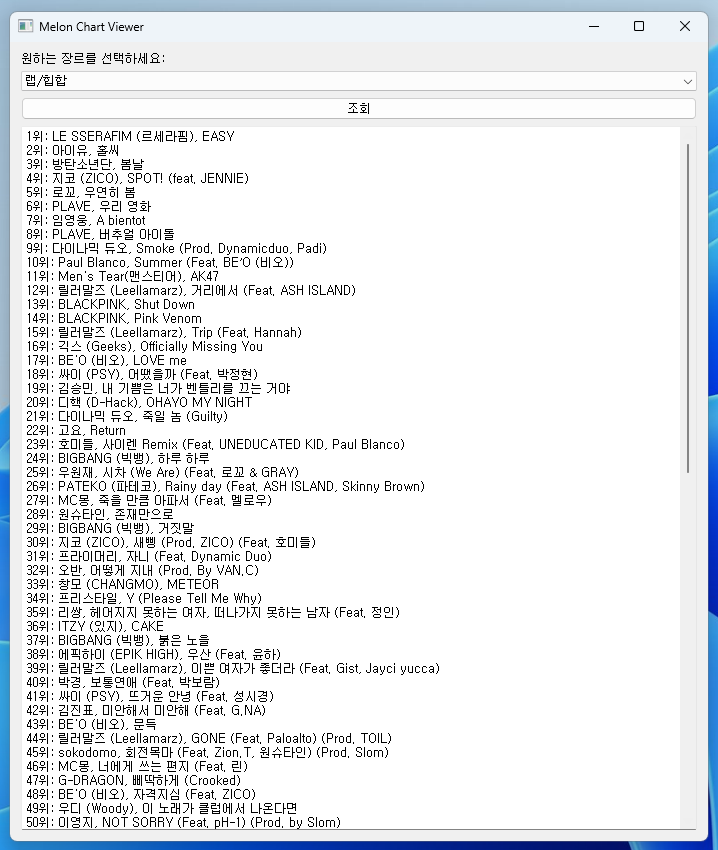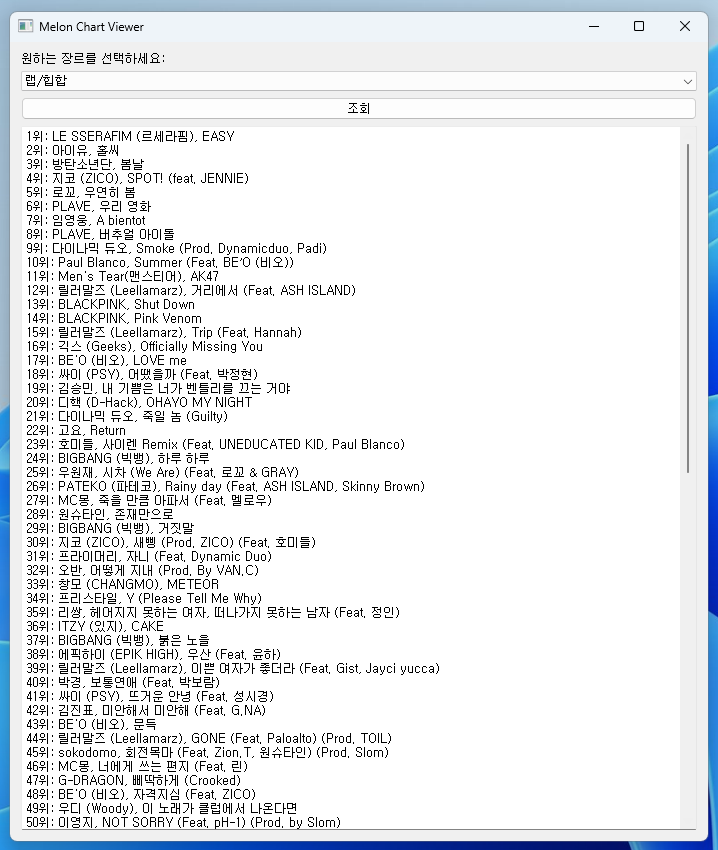